In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('penguins_size.csv', converters={'sex': lambda x: int(x == 'MALE')})
df1=df.dropna()
df2=df1.drop('island', axis=1)
df2.rename(columns={'culmen_length_mm': 'Culmen_Length_(mm)', 'culmen_depth_mm': 'Culmen_Depth_(mm)'
                   , 'flipper_length_mm': 'Flipper_Length_(mm)', 'body_mass_g': 'Mass_(g)' }, inplace=True)
df2

,species,Culmen_Length_(mm),Culmen_Depth_(mm),Flipper_Length_(mm),Mass_(g),sex
0,Adelie,39.1,18.7,181.0,3750.0,1
1,Adelie,39.5,17.4,186.0,3800.0,0
2,Adelie,40.3,18.0,195.0,3250.0,0
4,Adelie,36.7,19.3,193.0,3450.0,0
5,Adelie,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0,0
340,Gentoo,46.8,14.3,215.0,4850.0,0
341,Gentoo,50.4,15.7,222.0,5750.0,1
342,Gentoo,45.2,14.8,212.0,5200.0,0


Text(0.5, 1.0, 'Culmen Length of Penguins')

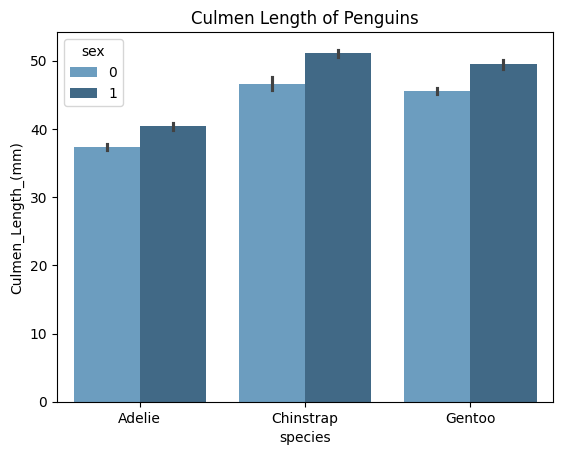

In [3]:
sns.barplot(x='species', y='Culmen_Length_(mm)', data=df2, palette='Blues_d', hue='sex').set_title('Culmen Length of Penguins')

Text(0.5, 1.0, 'Culmen Depth of Penguins')

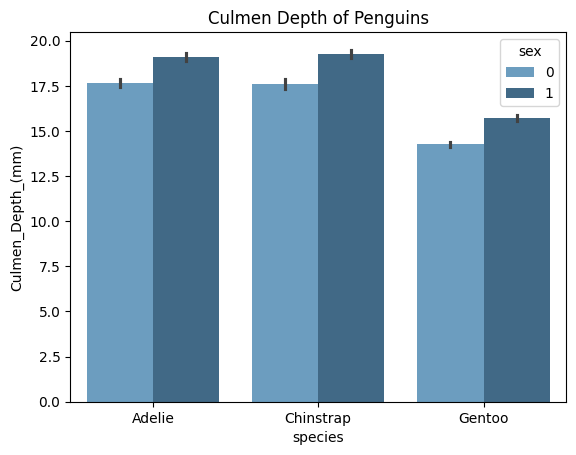

In [4]:
sns.barplot(x='species', y='Culmen_Depth_(mm)', data=df2, palette='Blues_d', hue='sex').set_title('Culmen Depth of Penguins')

Text(0.5, 1.0, 'Mass of Penguins')

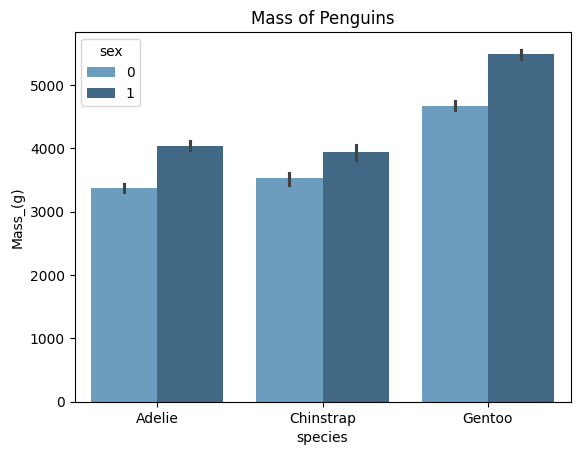

In [5]:
sns.barplot(x='species', y='Mass_(g)', data=df2, palette='Blues_d', hue='sex').set_title('Mass of Penguins')

In [6]:
#codes referenced from Andy McDonald
def find_clusters(data, max_k):
    means=[]
    inertia=[]
    for i in range(1,max_k):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        means.append(i)
        inertia.append(kmeans.inertia_)

    fig, ax = plt.subplots(dpi=144)
    plt.plot(means, inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show
    return

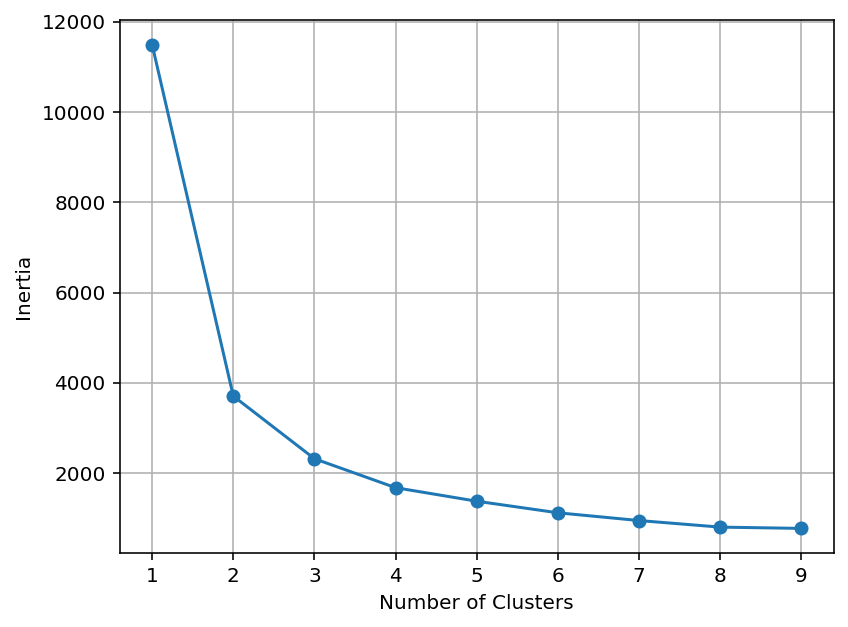

In [7]:
find_clusters(df2[['Culmen_Length_(mm)', 'Culmen_Depth_(mm)']], 10)

In [8]:
kmeans = KMeans(n_clusters=3, n_init=20)

kmeans.fit(df2[['Culmen_Length_(mm)', 'Culmen_Depth_(mm)']])
labels = kmeans.labels_

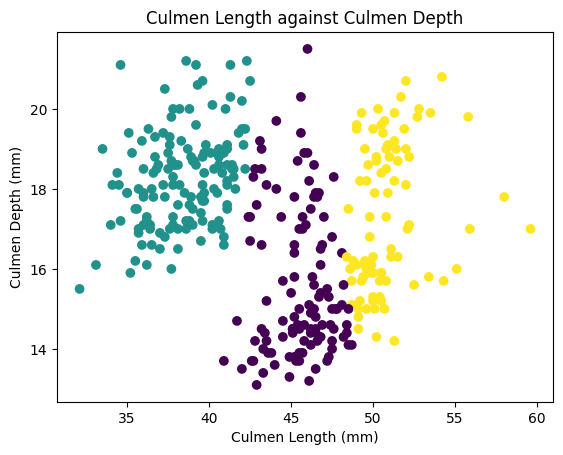

In [9]:
plt.scatter(x=df2['Culmen_Length_(mm)'], y=df2['Culmen_Depth_(mm)'], c=labels)
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Culmen Length against Culmen Depth')
plt.show()

<Axes: xlabel='Culmen_Length_(mm)', ylabel='Culmen_Depth_(mm)'>

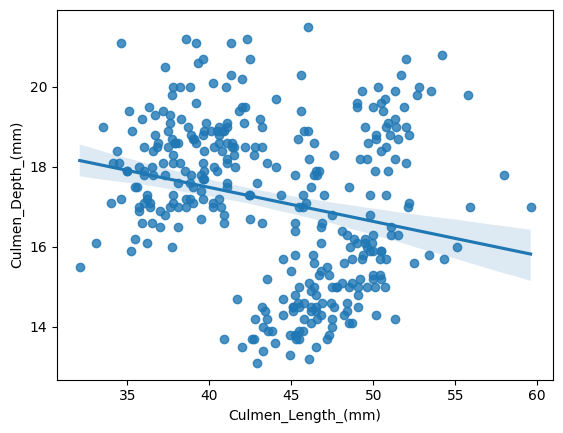

In [10]:
sns.regplot(x="Culmen_Length_(mm)", y="Culmen_Depth_(mm)", data=df2)

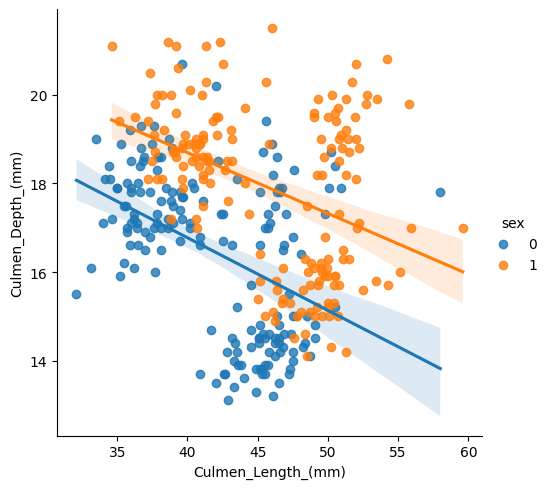

In [11]:
sns.lmplot(x="Culmen_Length_(mm)", y="Culmen_Depth_(mm)", data=df2, hue='sex')

In [12]:
def one_silhoutte(n, xy):
    """
    Calculates the silhoutte score for n clusters
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_

    # calculate the silhoutte score
    score = silhouette_score(xy, labels)

    return score

In [13]:
best_n, best_score = None, -np.inf
for n in range(2, 11):  # 2 to 10 clusters
    score = one_silhoutte(n, df2[['Culmen_Length_(mm)','Culmen_Depth_(mm)']])
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

print(f"Best number of clusters = {best_n:2g}")

 2 clusters silhoutte score = 0.57
 3 clusters silhoutte score = 0.49
 4 clusters silhoutte score = 0.44
 5 clusters silhoutte score = 0.41
 6 clusters silhoutte score = 0.43
 7 clusters silhoutte score = 0.45
 8 clusters silhoutte score = 0.42
 9 clusters silhoutte score = 0.42
10 clusters silhoutte score = 0.42
Best number of clusters =  2


In [14]:
def plot_box(df):
    
    plt.figure(dpi=144)

    plt.boxplot(df)

    plt.ylabel('Length & Depth (mm)')
    plt.show()
    
    return

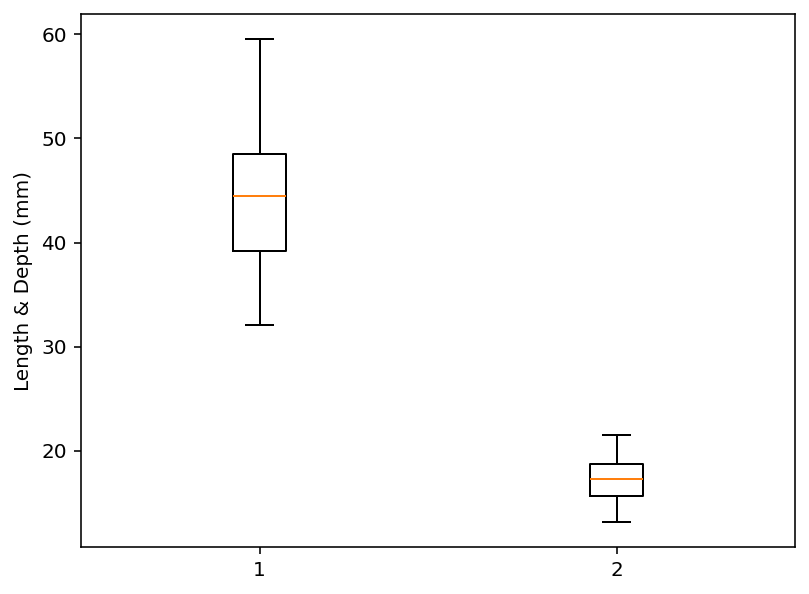

In [15]:
plot_box(df2[['Culmen_Length_(mm)','Culmen_Depth_(mm)']])